<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-08-27 16:29:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  25.7MB/s    in 1.4s    

2023-08-27 16:29:31 (25.7 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [57]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_0, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_1, *['COUNT(*)', 'count()', None], **{})
chart

## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [10]:
import matplotlib.pyplot as plt


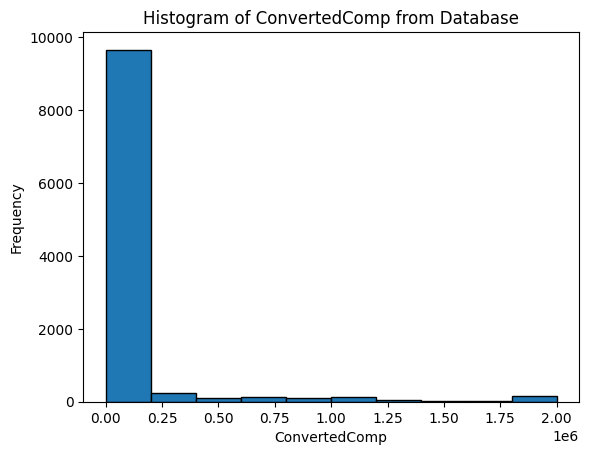

In [ ]:
# your code goes here
query1 = "SELECT ConvertedComp FROM master"
df1 = pd.read_sql_query(query1, conn)
plt.hist(df1['ConvertedComp'], bins=10, edgecolor='black')

plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp from Database')

plt.show()

### Box Plots


Plot a box plot of `Age.`


In [ ]:
query2 = "SELECT Age FROM master"
df2 = pd.read_sql_query(query2, conn)
#df2.isna().sum()
most_frequent_age = df2['Age'].value_counts().idxmax()
df2['Age'].fillna(most_frequent_age, inplace=True)
df2.isna().sum()

Age    0
dtype: int64

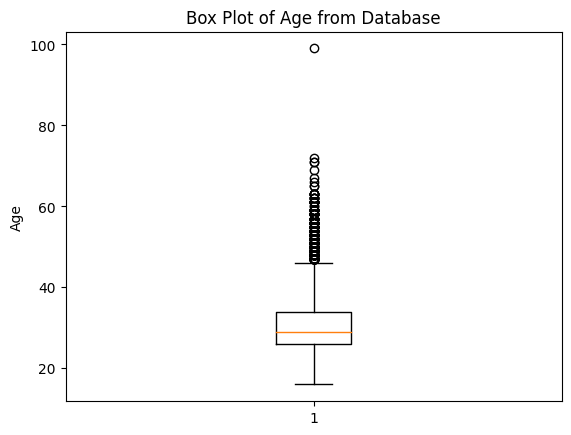

In [ ]:
# your code goes here
plt.boxplot(df2['Age'])
plt.ylabel('Age')
plt.title('Box Plot of Age from Database')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


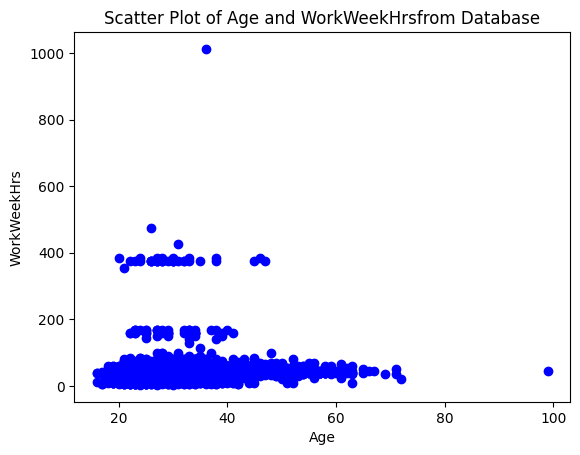

In [ ]:
# your code goes here
query3 = "SELECT Age, WorkWeekHrs FROM master"
df3 = pd.read_sql_query(query3, conn)

plt.scatter(df3['Age'], df3['WorkWeekHrs'], color='blue')

plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age and WorkWeekHrsfrom Database')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


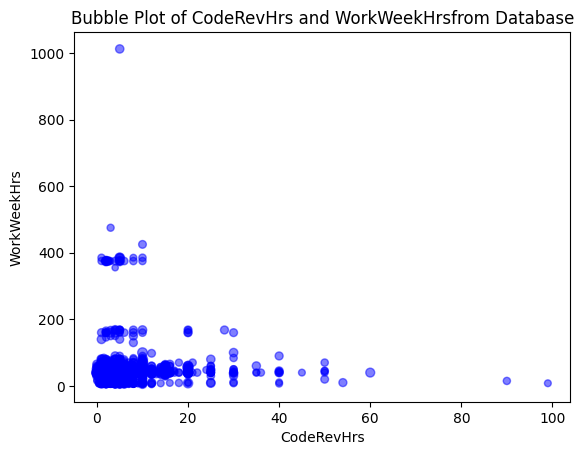

In [ ]:
# your code goes here
query4 = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df4 = pd.read_sql_query(query4, conn)

plt.scatter(df4['CodeRevHrs'], df4['WorkWeekHrs'], s=df4['Age'], color='blue', alpha=0.5)

plt.xlabel('CodeRevHrs')
plt.ylabel('WorkWeekHrs')
plt.title('Bubble Plot of CodeRevHrs and WorkWeekHrsfrom Database')
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


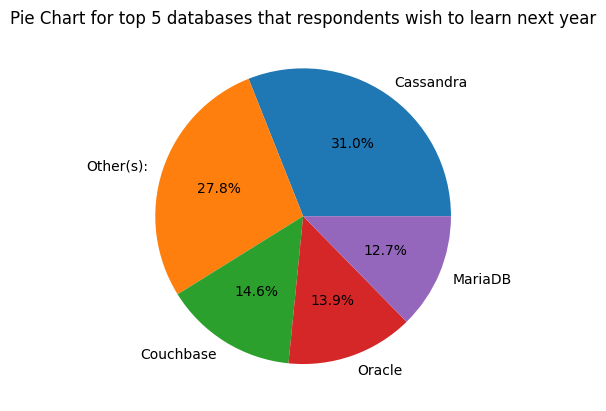

In [20]:
# your code goes here
query6 = "SELECT * FROM DatabaseDesireNextYear group by DatabaseDesireNextYear order by Respondent DESC"
df6 = pd.read_sql_query(query6, conn)
df7 = df6.head(5)
df7
plt.pie(df7['Respondent'], labels = df7['DatabaseDesireNextYear'], autopct='%1.1f%%')
plt.title('Pie Chart for top 5 databases that respondents wish to learn next year')
plt.show()

In [55]:
df6

,Respondent,DatabaseDesireNextYear
0,49,Cassandra
1,44,Other(s):
2,23,Couchbase
3,22,Oracle
4,20,MariaDB
5,19,DynamoDB
6,16,MongoDB
7,16,Microsoft SQL Server
8,16,Elasticsearch
9,13,Firebase


In [59]:
query10 = "SELECT * FROM LanguageDesireNextYear group by LanguageDesireNextYear order by Respondent DESC"
df10 = pd.read_sql_query(query10, conn)
df10

,Respondent,LanguageDesireNextYear
0,140,Dart
1,130,Erlang
2,111,VBA
3,94,Assembly
4,57,Elixir
5,56,Scala
6,39,F#
7,29,Clojure
8,23,Swift
9,23,Objective-C


In [68]:
query11 = "SELECT * FROM DatabaseWorkedWith"
df11 = pd.read_sql_query(query11, conn)
df11['DatabaseWorkedWith'].value_counts()

MySQL                   5469
Microsoft SQL Server    4110
PostgreSQL              4097
SQLite                  3248
MongoDB                 3016
Redis                   2508
Elasticsearch           1954
Oracle                  1744
MariaDB                 1709
Firebase                1314
DynamoDB                 831
Other(s):                728
Cassandra                397
Couchbase                250
Name: DatabaseWorkedWith, dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


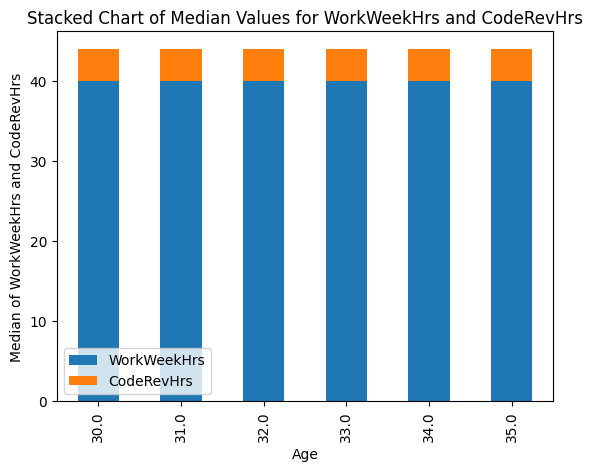

In [34]:
# your code goes here
query5 = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE Age BETWEEN 30 AND 35"
df5 = pd.read_sql_query(query5, conn)
#df5['WorkWeekHrs'].median()
#df5['CodeRevHrs'].median()
median_values = df5.groupby('Age').median()
median_values.plot(kind='bar', stacked=True)

plt.xlabel('Age')
plt.ylabel('Median of WorkWeekHrs and CodeRevHrs')
plt.title('Stacked Chart of Median Values for WorkWeekHrs and CodeRevHrs')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


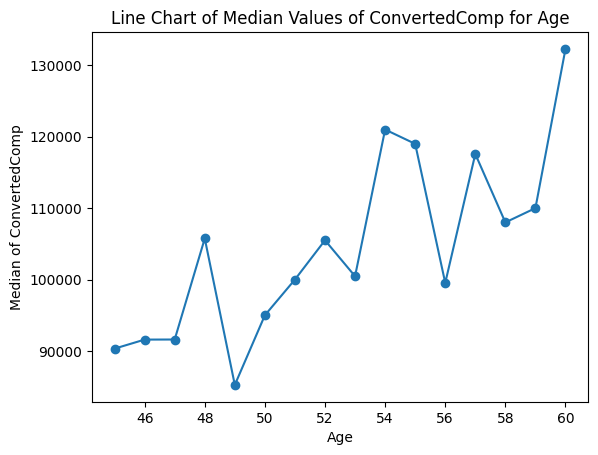

In [37]:
# your code goes here
query8 = "SELECT ConvertedComp, Age FROM master WHERE Age BETWEEN 45 AND 60"
df8 = pd.read_sql_query(query8, conn)

median_values2 = df8.groupby('Age')['ConvertedComp'].median()
median_values2.plot(kind='line', marker='o')

plt.xlabel('Age')
plt.ylabel('Median of ConvertedComp')
plt.title('Line Chart of Median Values of ConvertedComp for Age')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


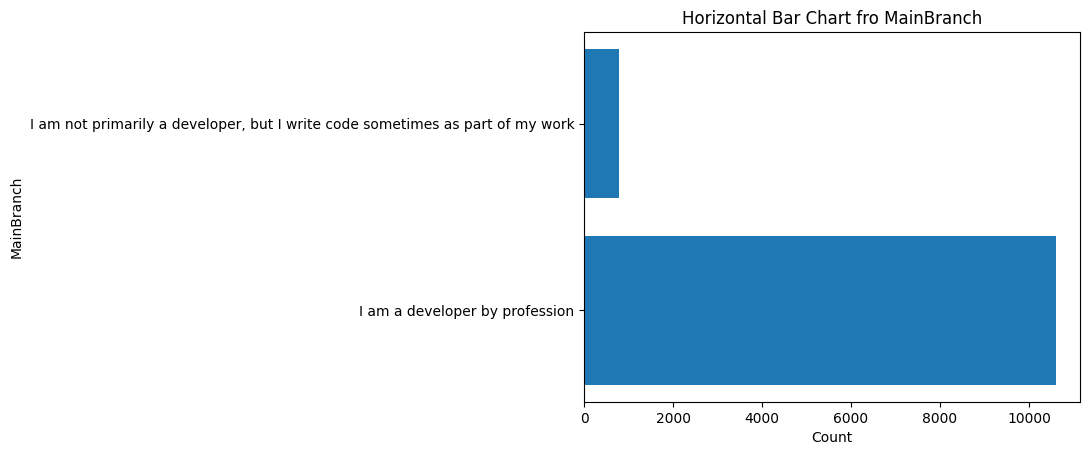

In [53]:
# your code goes here
query9 = "SELECT * FROM master"
df9 = pd.read_sql_query(query9, conn)
value_counts_df = df9['MainBranch'].value_counts().reset_index()
value_counts_df.columns = ['MainBranch', 'Count']
plt.barh(value_counts_df['MainBranch'], value_counts_df['Count'])

plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.title('Horizontal Bar Chart fro MainBranch')

plt.show()

Close the database connection.


In [70]:
query12 = "SELECT * FROM DevType"
df12 = pd.read_sql_query(query12, conn)
df12['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

In [71]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
